In [1]:
#importação de pacotes e da função de custo (J)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from custo_reglin_uni import custo_reglin_uni

In [2]:
def plot(data, theta):
    #dados de entrada X e y
    dataset = pd.read_csv(data, header=None)
    X = dataset.iloc[:, 0:-1].values
    y = dataset.iloc[:, -1:].values
    
    # Incluir o valor de 1 em x, pois theta0 = 1
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Valores de theta0 e theta1 informados no enunciado do trabalho
    theta0 = np.arange(-10, 10, 0.01)
    theta1 = np.arange(-1, 4, 0.01)

    # Inicia os valores de J com zeros
    J = np.zeros((len(theta0), len(theta1)))

    # Preenche os valores sucessivos de J
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            t = [[theta0[i]], [theta1[j]]]
            J[i,j] = custo_reglin_uni(X, y, t)

    # Transpoe J devido as funcoes contour/meshgrid
    J = np.transpose(J)

    # Plota a funcao de custo utilizando levels como logspace. Range -1 ~ 4 devido ao
    # range de theta1 e 20 pois o theta0 tem 20 valores (-10 ate 10)
    fig = plt.figure()
    fig, ax = plt.subplots()
    #desenha linhas do contorno
    ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20)) #, color='blue' -> parte retirada do código, pois retorna erro
    #marca o ponto ótimo de theta[0] e theta [1]
    ax.plot(theta[0,0], theta[1,0], 'rx')
    plt.xlabel('theta0')
    plt.ylabel('theta1')

    filename = 'target/plot1.3.1.png'
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

    return J

<Figure size 432x288 with 0 Axes>

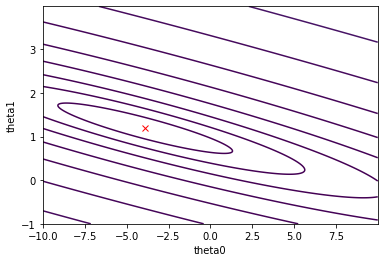

In [4]:
#chamada da função plot indicando o caminho do arquivo e os valores de theta, necessário transformá-los em np.array
# para suprimir o erro “List indices must be integers or slices, not tuple”
th=[-3.89530051],[ 1.19298539]
#variável 'jota' será necessária na plotagem do gráfico de superfície
jota=plot(data='data/ex1data1.txt', theta=np.array(th))